<a href="https://colab.research.google.com/github/RajorshiAdhikaryProjects/Telco-Customer-Churn-Prediction-Project/blob/main/Telco_Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fetch the Dataset from Kaagle

In [57]:
!pip install kaggle

!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/

!kaggle datasets download -d blastchar/telco-customer-churn

!unzip telco-customer-churn.zip
print('Data Unzipped')


Dataset URL: https://www.kaggle.com/datasets/blastchar/telco-customer-churn
License(s): copyright-authors
  0% 0.00/172k [00:00<?, ?B/s]
100% 172k/172k [00:00<00:00, 93.5MB/s]
Archive:  telco-customer-churn.zip
  inflating: WA_Fn-UseC_-Telco-Customer-Churn.csv  
Data Unzipped


# Importing Libraries

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
import pickle

# Loading the Dataset

In [59]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Data Preprocessing

In [60]:
df.drop('customerID', axis=1, inplace=True)

In [61]:
df.shape

(7043, 20)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [63]:
df.TotalCharges=pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


# **Handling Missing Values in TotalCharges**

In [64]:
df['TotalCharges'].isnull().sum()/df.shape[0]*100

0.1561834445548772

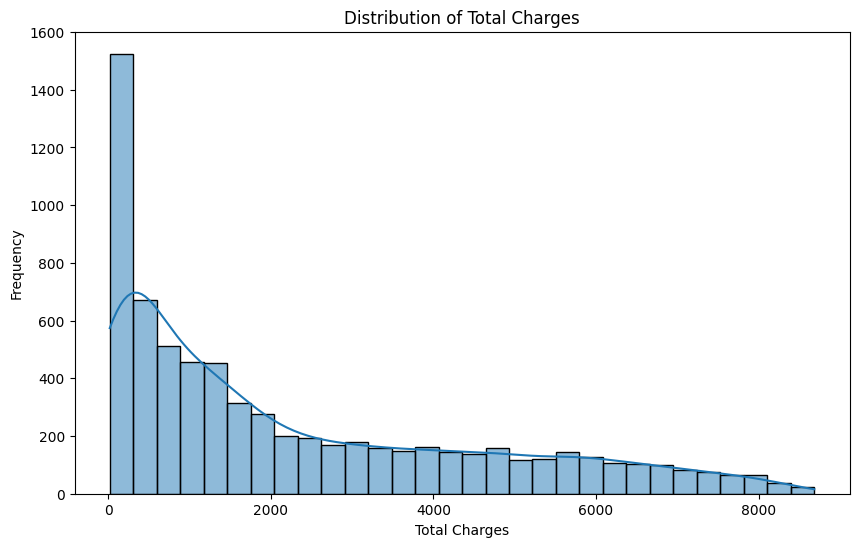

In [65]:
# Plotting a histogram for TotalCharges to see the distribuion of TotalCharges
plt.figure(figsize=(10, 6))
sns.histplot(df['TotalCharges'], bins=30, kde=True)
plt.title('Distribution of Total Charges')
plt.xlabel('Total Charges')
plt.ylabel('Frequency')
plt.show()


**Correlation matrix for numerical features**

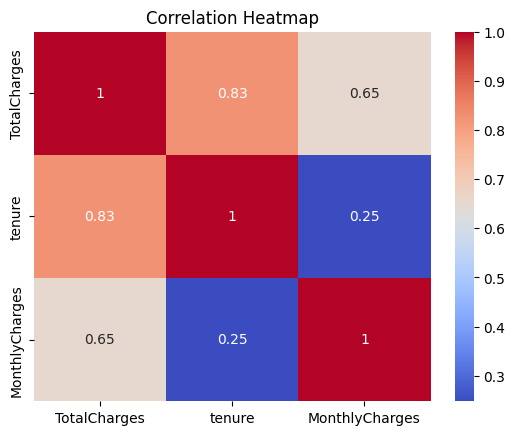

In [66]:
# Correlation matrix for numerical features
corr_matrix = df[['TotalCharges', 'tenure', 'MonthlyCharges']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


**Fill TotalCharges with Linear Regresion moel using tenure feature**

In [67]:
from sklearn.linear_model import LinearRegression

# Extract rows with non-null TotalCharges for training
df_non_null = df[df['TotalCharges'].notnull()]
df_null = df[df['TotalCharges'].isnull()]

# Feature and target for training the regression model
X_train = df_non_null[['tenure']]  # Use tenure as the predictor
y_train = df_non_null['TotalCharges']

# Train a linear regression model
reg = LinearRegression()
reg.fit(X_train, y_train)

# Predict the missing TotalCharges values using tenure
X_test = df_null[['tenure']]
predicted_total_charges = reg.predict(X_test)

# Fill in the missing values in the original dataframe
df.loc[df['TotalCharges'].isnull(), 'TotalCharges'] = predicted_total_charges

# Check if the missing values were filled successfully
print(df['TotalCharges'].isnull().sum())  # Should print 0


0


In [68]:
df.isnull().sum().sum()

0

In [69]:
(df['Churn'].value_counts()/df.shape[0])*100

,count
Churn,
No,73.463013
Yes,26.536987


# Encoding Categorical Variables

In [70]:
df['Churn'] = np.where(df.Churn == 'Yes',1,0)


df_dummies = pd.get_dummies(df, drop_first= True)

df_dummies = df_dummies.astype(int)

df_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29,29,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,1,0
1,0,34,56,1889,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,2,53,108,1,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
3,0,45,42,1840,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,0,2,70,151,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0


In [71]:
# Calculate correlation matrix
corr_matrix = df_dummies.corr()

# Set a threshold to identify highly correlated features (e.g., 0.9)
high_corr_var = np.where(corr_matrix > 0.9)

# Create a set to store columns to drop
cols_to_drop = set()

# Iterate and store correlated features for removal
for i in range(len(high_corr_var[0])):
    if high_corr_var[0][i] != high_corr_var[1][i]:  # Avoid self-correlation
        cols_to_drop.add(corr_matrix.columns[high_corr_var[0][i]])

# Drop the identified columns
df_dummies.drop(cols_to_drop, axis=1, inplace=True)


**Prepare features (X) and target (y)**

In [72]:
X = df_dummies.drop('Churn', axis=1)
y = df_dummies['Churn']

# Train-Test Split

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Standardize the Features (Standard Scaler)

In [74]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Handle Class Imbalance Using SMOTE

In [75]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Hyperparameter Tuning for Logistic Regression

In [76]:
param_grid = {
    'C': [.1, 1, 10, 100],  # Regularization strength
    'solver': ['liblinear', 'lbfgs', 'saga'],  # Solvers to try
    'penalty': ['l2'],  # L2 regularization
    'max_iter': [100, 200, 500],  # Maximum iterations
}

# Initialize Logistic Regression model
log_reg = LogisticRegression(class_weight='balanced', random_state=42)

# GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='roc_auc', verbose=1, n_jobs=-1)
grid_search.fit(X_train_resampled, y_train_resampled)

# Best parameters from GridSearch
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Hyperparameters: {'C': 100, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}


# Final Model Training with Best Parameters

In [77]:
best_model = grid_search.best_estimator_

# Model Evaluation

**Predictions**

In [78]:
y_pred = best_model.predict(X_test_scaled)

**Classification Report**

In [79]:
print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.72      0.81      1552
           1       0.51      0.80      0.62       561

    accuracy                           0.74      2113
   macro avg       0.71      0.76      0.71      2113
weighted avg       0.80      0.74      0.76      2113



**Confusion Matrix**

In [80]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[1124  428]
 [ 115  446]]


**ROC-AUC Score**

In [81]:
roc_auc = roc_auc_score(y_test, best_model.predict_proba(X_test_scaled)[:, 1])
print(f"ROC-AUC Score: {roc_auc}")

ROC-AUC Score: 0.8450105206093683


# Save the Model

In [82]:
with open('telco_customer_churn_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)

print("Model saved as 'telco_customer_churn_model.pkl'")

Model saved as 'telco_customer_churn_model.pkl'
